0.0 Imports

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import scikitplot as skplt

import matplotlib.pyplot as plt

import sweetviz as sv

from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm
from sklearn import metrics



0.1 functions

0.2 Loading Dataset

In [2]:
data = pd.read_csv('../dataset/train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


1.0 data descriptionn

In [3]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
df1 = data.copy()
df1 = df1.rename(columns=lambda x: x.lower())            


1.1 Data Dimension

In [5]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Col: {}'.format(df1.shape[1]))

Number of Rows: 381109
Number of Col: 12


1.2 data types

In [6]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

1.3 Check NA

In [7]:
df1.isna().sum() #/ len(df1)*100

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

1.4 Data Descriptive

In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [9]:
num_attributes = df1.select_dtypes( include=['int64','float64'] )
cat_attributes = df1.select_dtypes( exclude= ['int64', 'float64'] )

In [10]:
# Central tendency - mean, mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean))
ct2 = pd.DataFrame(num_attributes.apply(np.median))

# dispersion - std,num_attributesge, skew, kurtosis
d1  = pd.DataFrame(num_attributes.apply(np.std))
d2  = pd.DataFrame(num_attributes.apply(min))
d3  = pd.DataFrame(num_attributes.apply(max))
d4  = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min()))
d5  = pd.DataFrame(num_attributes.apply(lambda x: x.skew()))
d6  = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis()))

# concatenar
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6], axis=1)
# Renomear as colunas
m.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# Exibir o DataFrame com as colunas renomeadas
m

,min,max,range,mean,median,std,skew,kurtosis
id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


2.0 Feature Enginier

In [11]:
df2 = df1.copy()

In [12]:
df2['vehicle_age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [13]:
# Convertendo a coluna para tipo string
df2['vehicle_damage'] = df2['vehicle_damage'].map({'Yes': 1, 'No': 0})

# Transformando em over e betwen
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' 
                                                                       if x == '1-2 Year' else 'below_1_year')

3.0 Data Filtering

In [14]:
df3 = df2.copy()

4.0 EDA

In [15]:
df4 = df3.copy()

## 4.1 Univariate Analysis

In [16]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [17]:
import sweetviz as sv

# Assuming you have a dataframe df4
#report = sv.analyze(df4)

# Save the report as an HTML file
#report.show_html('sweetviz_report.html')


5.0 Feature Selectio

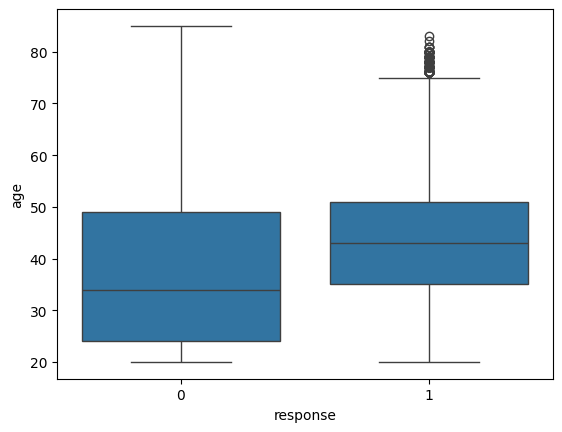

In [18]:
# 'age' medir a variacao = mediana de cada um dos grupos em relaçao as idades = grup de pessoas inter e nao intere distribicao dessas idades

sns.boxplot(x='response', y='age', data=df4);

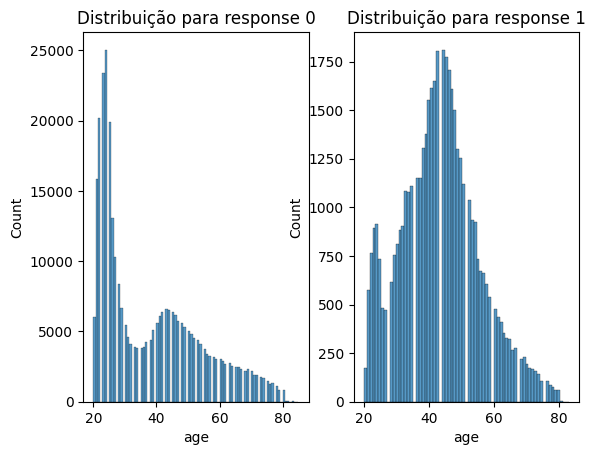

In [19]:
# Distribuição de var contínua == 0
aux00 = df4.loc[df4['response'] == 0, 'age']
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
sns.histplot(aux00)
plt.title('Distribuição para response 0')

# Distribuição de var contínua == 1
aux01 = df4.loc[df4['response'] == 1, 'age']
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
sns.histplot(aux01)
plt.title('Distribuição para response 1')

plt.show()

# obs amplit e shap

<Axes: xlabel='response', ylabel='annual_premium'>

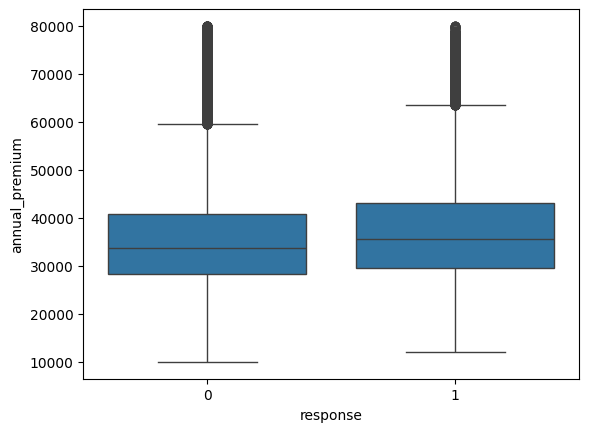

In [20]:
# 'annual_premium'
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
sns.boxplot(x='response', y='annual_premium', data=aux)

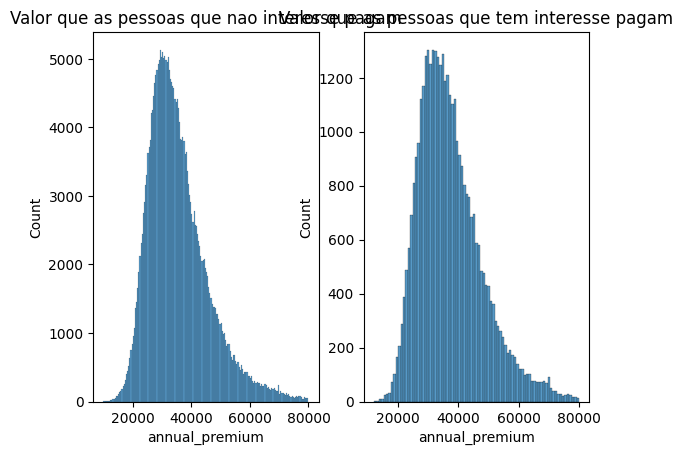

In [21]:
# Gráfico para response == 0
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
plt.subplot(1,2,1)
sns.histplot(aux00)
plt.title('Valor que as pessoas que nao interesse pagam')

# Gráfico para response == 1
aux01 = aux.loc[aux['response'] == 1, 'annual_premium']
plt.subplot(1,2,2)  # Mudei o número do subplot para 2
sns.histplot(aux01)
plt.title('Valor que as pessoas que tem interesse pagam')

plt.show()


In [22]:
df4['response'].value_counts()

response
0    334399
1     46710
Name: count, dtype: int64

In [23]:
df4['driving_license'].value_counts()

driving_license
1    380297
0       812
Name: count, dtype: int64

/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_14574/588122112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='response', y='driving_license', data=aux, palette=cores);


Text(0.5, 1.0, '0 nao responde 1 responde')

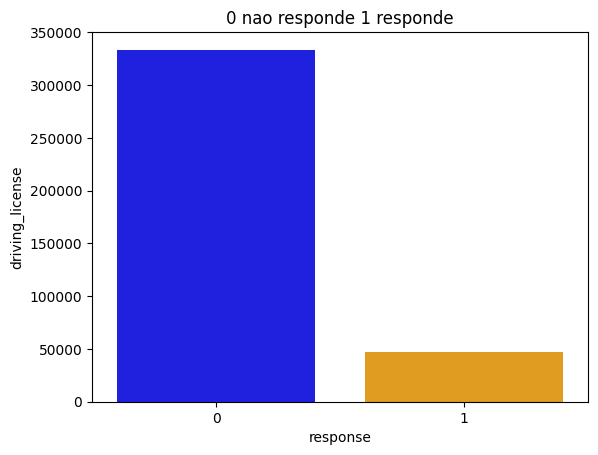

In [24]:
# 'driving_license'
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
cores = [ 'blue', 'Orange']
sns.barplot(x='response', y='driving_license', data=aux, palette=cores);
plt.title('0 nao responde 1 responde')



<Axes: xlabel='region_code', ylabel='id'>

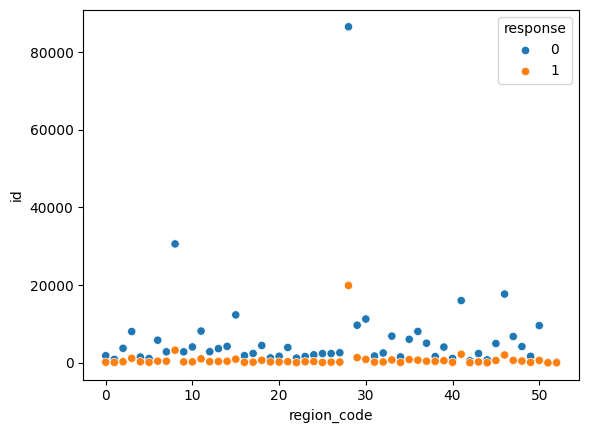

In [25]:
aux0 = df4[['id', 'region_code', 'response']].groupby(['region_code','response']).count().reset_index()
sns.scatterplot(x='region_code', y= 'id', hue='response', data=aux0)

In [26]:
# Validaccao cruzada
pd.crosstab(df4['previously_insured'], df4['response'])

response,0,1
previously_insured,,
0,159929,46552
1,174470,158


In [27]:
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/ x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [28]:
# 
df4[['vehicle_age', 'response']].value_counts().reset_index()

,vehicle_age,response,count
0,between_1_2_year,0,165510
1,below_1_year,0,157584
2,between_1_2_year,1,34806
3,over_2_years,0,11305
4,below_1_year,1,7202
5,over_2_years,1,4702


In [29]:
# 
df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,proportion
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


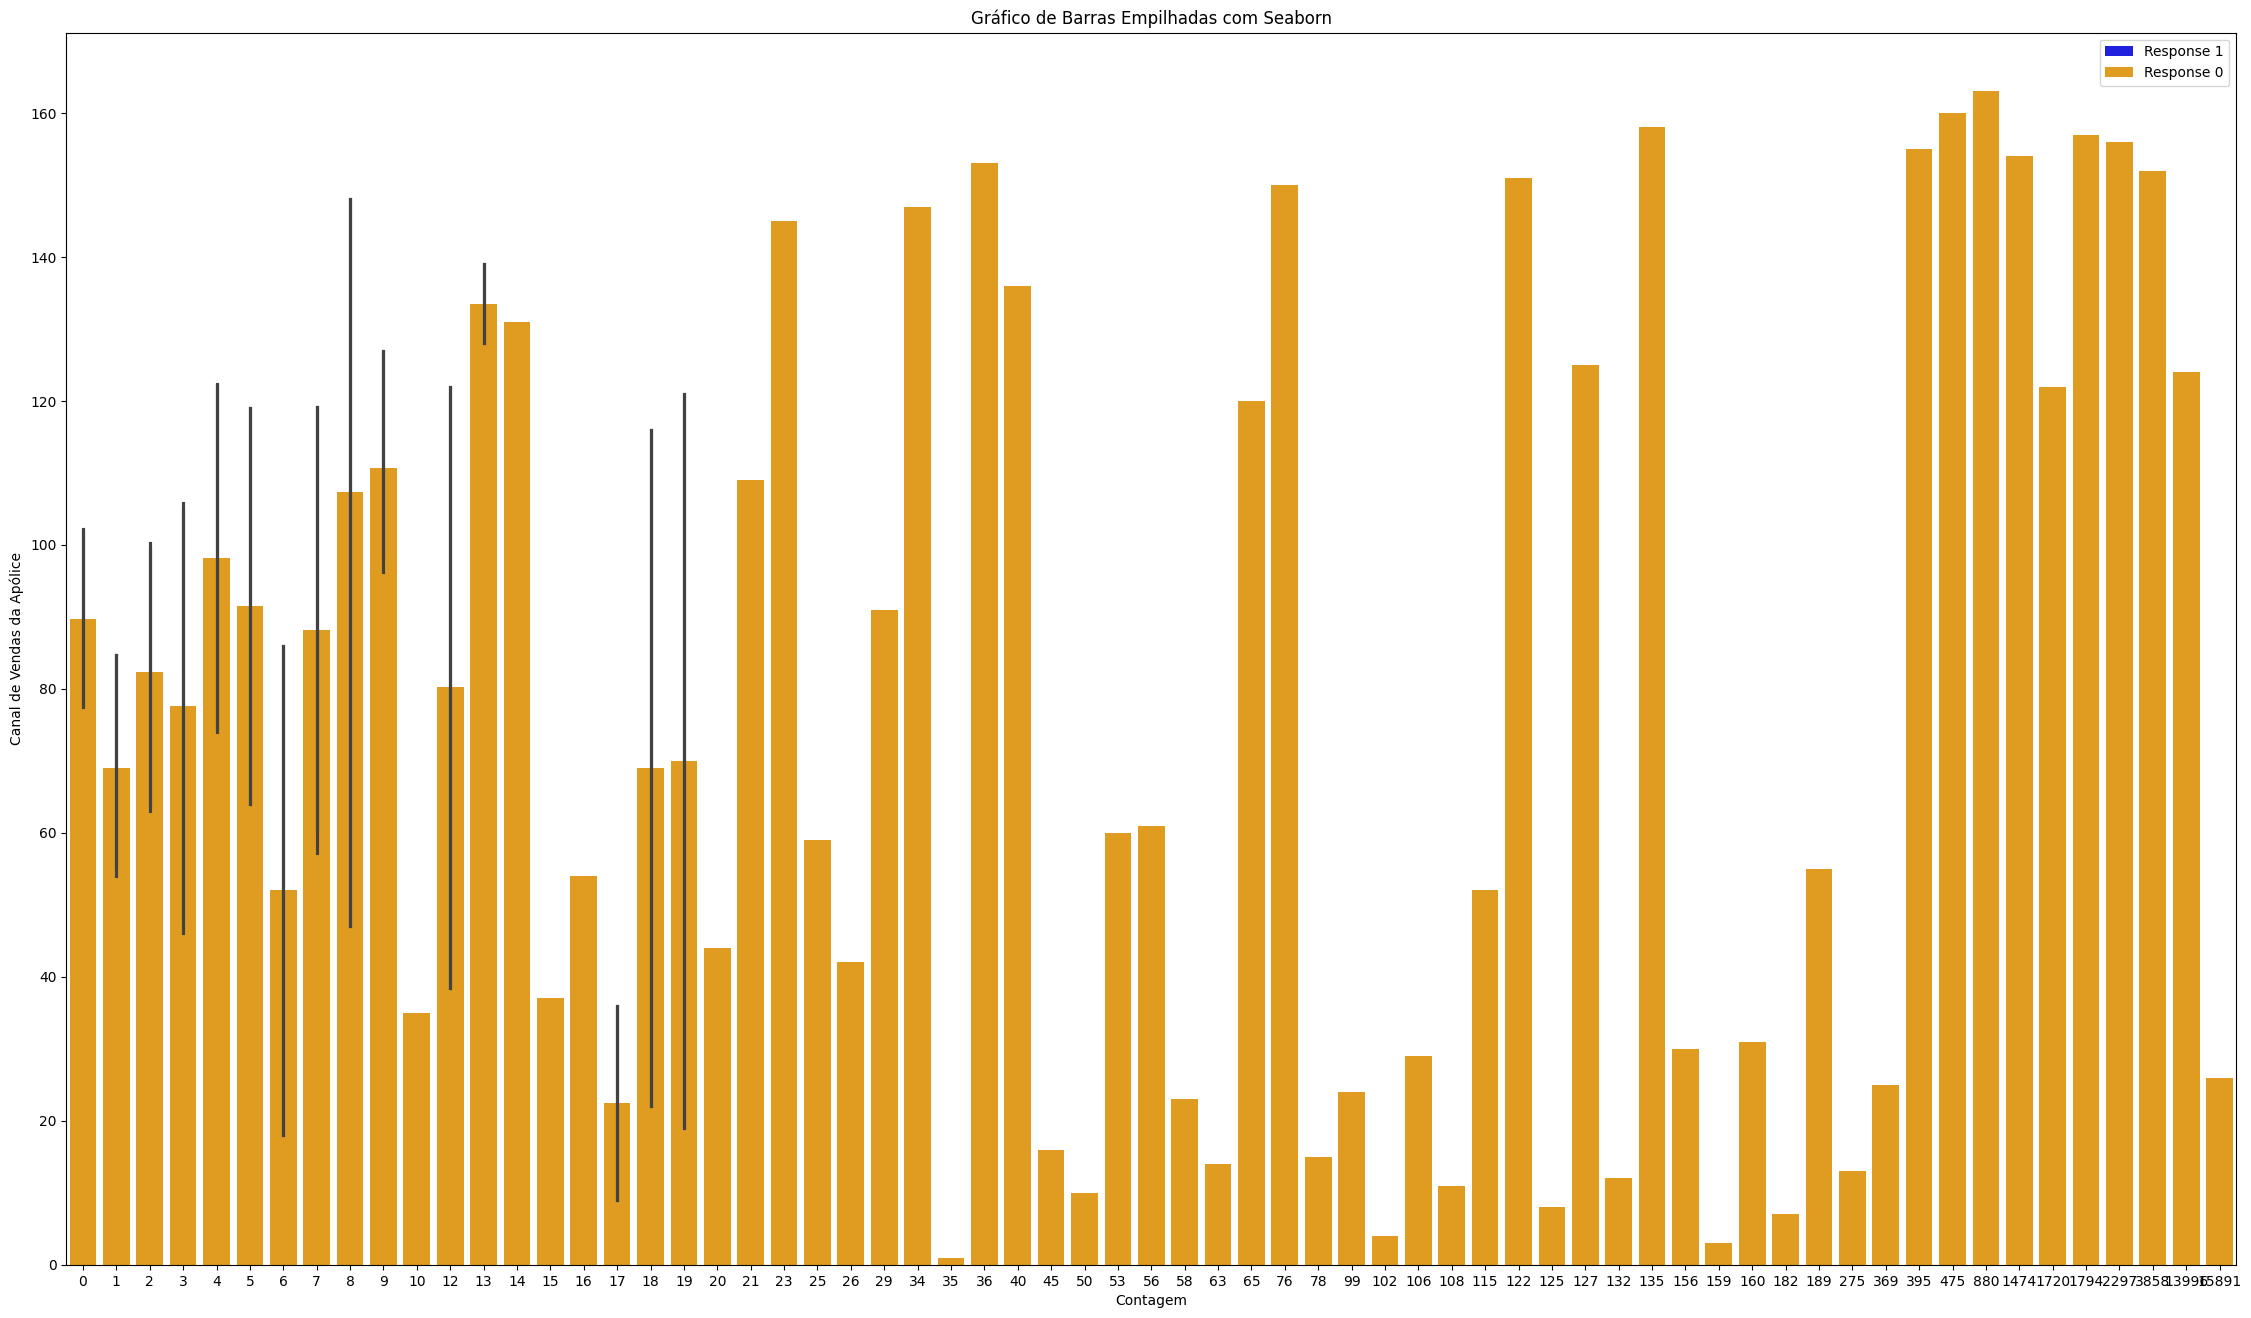

In [30]:
# Tamanho da figura
plt.figure(figsize=(28, 16))

# Agrupamento e soma das ocorrências por 'policy_sales_channel'
aux_ = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()

# Criando um gráfico de barras empilhadas
sns.barplot(x='response', y='policy_sales_channel', data=aux_, color='blue', label='Response 1')
sns.barplot(x=aux_['response'], y=aux_['policy_sales_channel'], color='orange', label='Response 0')

# Adicionando legendas e título
plt.xlabel('Contagem')
plt.ylabel('Canal de Vendas da Apólice')
plt.title('Gráfico de Barras Empilhadas com Seaborn')
plt.legend()

# Exibindo o gráfico
plt.show()

/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_14574/674831299.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='response', y='policy_sales_channel', data=aux_, palette='coolwarm', ci=None, estimator=lambda x: len(x) / len(df4) * 100)
/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_14574/674831299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='response', y='policy_sales_channel', data=aux_, palette='coolwarm', ci=None, estimator=lambda x: len(x) / len(df4) * 100)


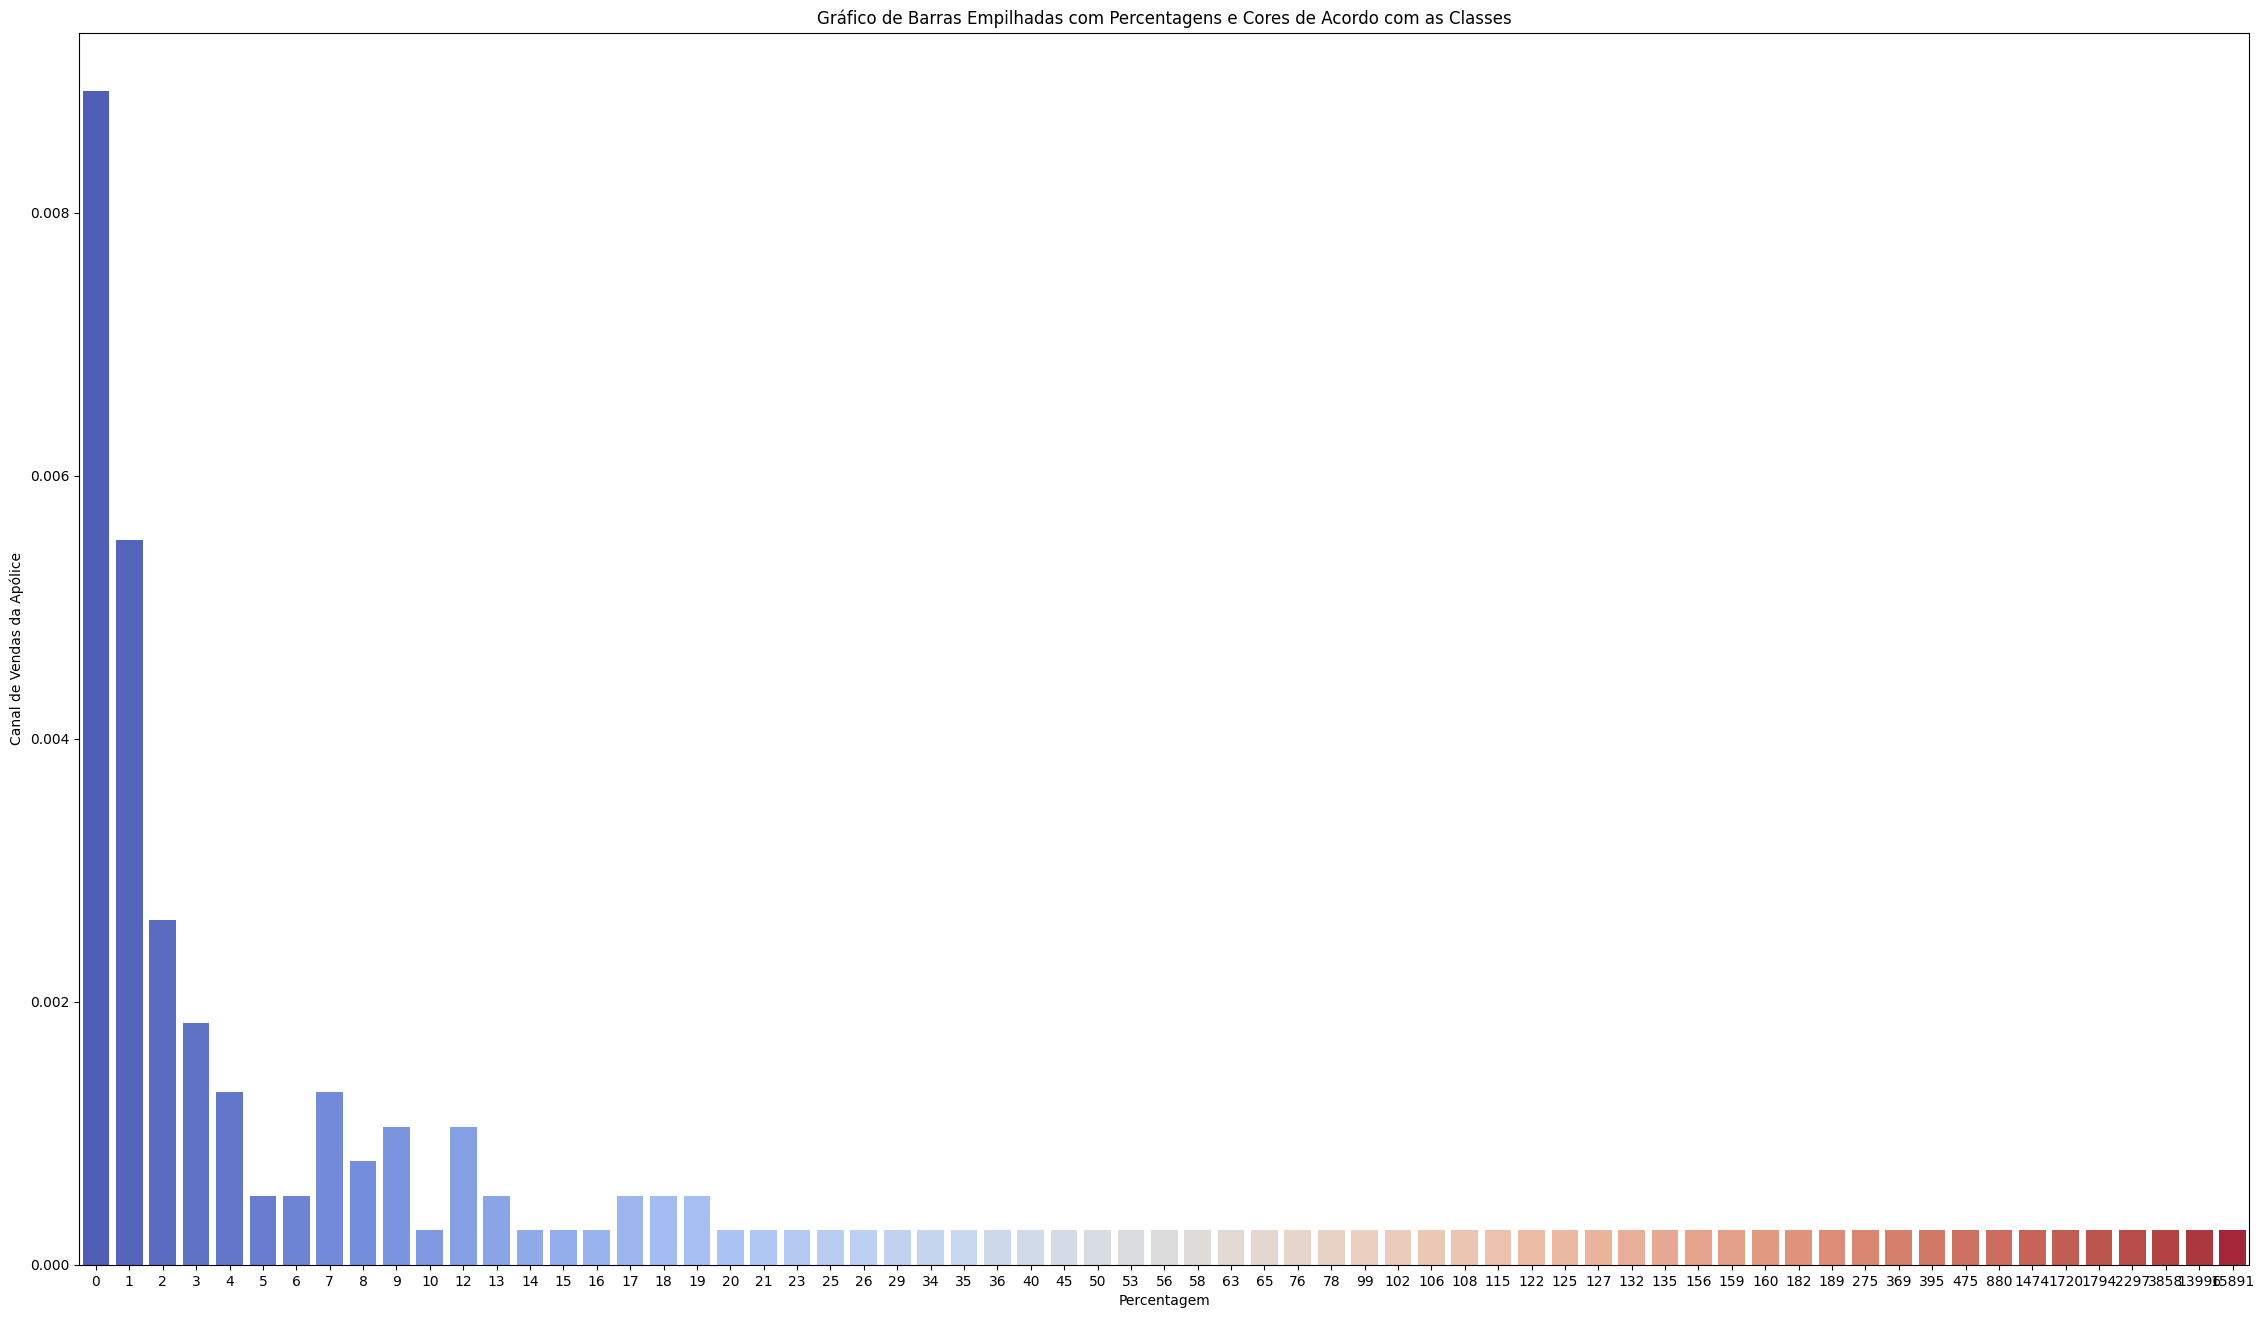

In [31]:
# Tamanho da figura
plt.figure(figsize=(28, 16))

# Agrupamento e soma das ocorrências por 'policy_sales_channel'
aux_ = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()

# Criando um gráfico de barras empilhadas com percentagens e cores de acordo com as classes
sns.barplot(x='response', y='policy_sales_channel', data=aux_, palette='coolwarm', ci=None, estimator=lambda x: len(x) / len(df4) * 100)

# Adicionando labels e título
plt.xlabel('Percentagem')
plt.ylabel('Canal de Vendas da Apólice')
plt.title('Gráfico de Barras Empilhadas com Percentagens e Cores de Acordo com as Classes')

# Exibindo o gráfico
plt.show()

<Axes: xlabel='response', ylabel='vintage'>

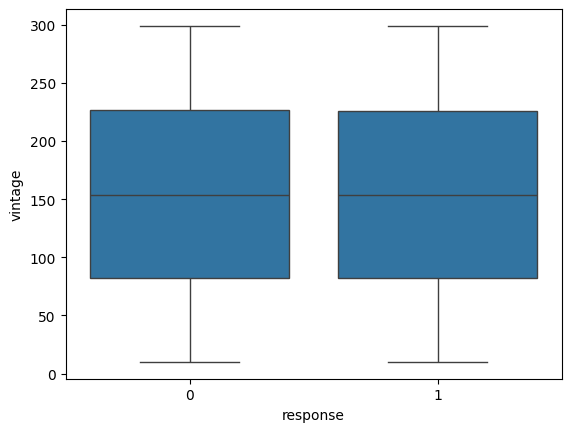

In [32]:
# 'vintage'
sns.boxplot(x='response', y='vintage', data=df4)


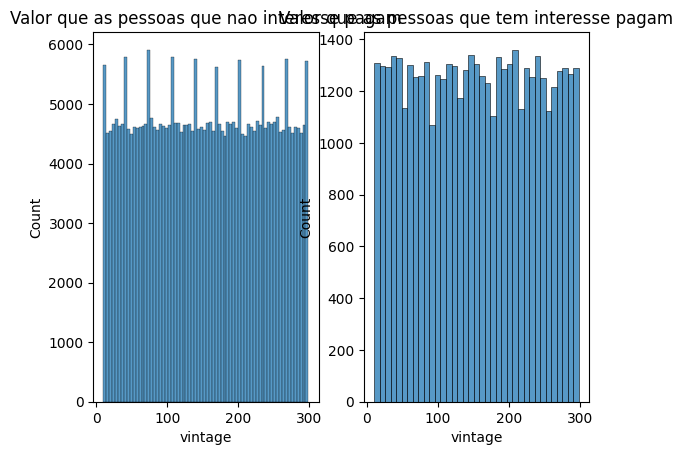

In [33]:
# Gráfico para response == 0
df400 = df4.loc[df4['response'] == 0, 'vintage']
plt.subplot(1,2,1)
sns.histplot(df400)
plt.title('Valor que as pessoas que nao interesse pagam')

# Gráfico para response == 1
df401 = df4.loc[df4['response'] == 1, 'vintage']
plt.subplot(1,2,2)  # Mudei o número do subplot para 2
sns.histplot(df401)
plt.title('Valor que as pessoas que tem interesse pagam')

plt.show()


# 5.0 Data Preparation

In [34]:
df5 = df4.copy()

In [35]:
# Exemplos de dados que vem de producao 

X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.20)

df5 = pd.concat( [x_train, y_train], axis=1 )

## Standardization 
(subtrai a media e divide pelo desvio padrao)

In [36]:
# .ft Calcula a med std da coluna e fazz subtraca e grav an var original e subscreve

ss = pp.StandardScaler() # = calc a med e o std da col e vai fazer as subtracoes e grava nas var orig
# annual_premium 
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

# rescaling 
(rescala dos inytervalos que fica entre 0 e 1)

In [37]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform( df5[['age']].values ) 
# vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )

# Encoder 
(Muda o tipo da var de cat para num)

In [38]:
# gender - One Hot encoding / Target Encoding
target_encoding_gender = df5.groupby( 'gender' )[ 'response' ].mean()
df5.loc[:, 'gender' ] = df5['gender'].map(target_encoding_gender)

# region_code One hot Encoding / Frequency Encoding / Target Encoding
target_encoding_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encoding_region_code)

# vehicle_age
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len( df5 )
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )



target_encoding_region_code: Calcula a média da variável de resposta ('response') para cada valor único em 'region_code' e armazena em target_encoding_region_code.
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encoding_region_code): Substitui os valores na coluna 'region_code' pelos valores médios calculados anteriormente. Isso é uma forma de Target Encoding.
pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age']): Aplica One-Hot Encoding à variável categórica 'vehicle_age', criando colunas binárias separadas para cada categoria e adicionando um prefixo ("vehicle_age") a essas colunas.
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5): Calcula a frequência relativa de cada valor único em 'policy_sales_channel'.
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel): Substitui os valores na coluna 'policy_sales_channel' pelos valores de frequência relativa calculados anteriormente. Isso é uma forma de Frequency Encoding.
Essas transformações estão sendo aplicadas às colunas específicas do DataFrame df5 para preparar os dados para um modelo de machine learning. A escolha entre One-Hot Encoding, Frequency Encoding ou Target Encoding para 'region_code' e 'policy_sales_channel' 

In [39]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_below_1_year,vehicle_age_between_1_2_year,vehicle_age_over_2_years
289741,289742,0.104031,0.030769,1,0.078984,1,0,0.375249,0.057323,0.768166,0,True,False,False
101201,101202,0.138188,0.369231,1,0.187424,0,1,0.632498,0.001542,0.792388,0,False,True,False
7653,7654,0.138188,0.246154,1,0.187424,0,1,0.887307,0.002237,0.038062,1,False,True,False
168290,168291,0.138188,0.523077,1,0.103402,0,1,-1.621022,0.208769,0.519031,0,False,False,True
100125,100126,0.138188,0.015385,1,0.057835,0,1,-0.496178,0.057323,0.961938,0,True,False,False


# 5.4  Validation Preparation

In [40]:
# preparacao dos daos de validacao 

# gender
x_val.loc[:, 'gender'] = x_val.loc[:,'gender'].map(target_encoding_gender)
# age
x_val.loc[:, 'age'] = mms_age.transform(x_val[['age']].values)
# region_code
x_val.loc[:, 'region_code'] = x_val.loc[:, 'region_code'].map(target_encoding_region_code)
# vehicle_age
x_val = pd.get_dummies(x_val, prefix='vehicle_age', columns=['vehicle_age'])
# annual_primium
x_val.loc[:, 'annual_premium'] = ss.transform(x_val[['annual_premium']].values)
# policy_sales_chanel
x_val.loc[:, 'policy_sale_channel'] = x_val['policy_sales_channel'].map(fe_policy_sales_channel)
# vintage
x_val.loc[:, 'vintage'] = mms_vintage.transform(x_val[['vintage']].values)
# fillna
x_val = x_val.fillna(0)

# 6.0 Feature Selection

## 6.2 Feature de Importancia

In [41]:
# Model definition
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)

# Data preparation
x_train_n = df5.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)



ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                        feature  importance
0                       vintage    0.272592
0                annual_premium    0.244528
0                           age    0.165842
0                   region_code    0.105239
0                vehicle_damage    0.070973
0          policy_sales_channel    0.059868
0            previously_insured    0.053397
0      vehicle_age_below_1_year    0.014015
0  vehicle_age_between_1_2_year    0.006296
0                        gender    0.004525
0      vehicle_age_over_2_years    0.002218
0               driving_license    0.000508


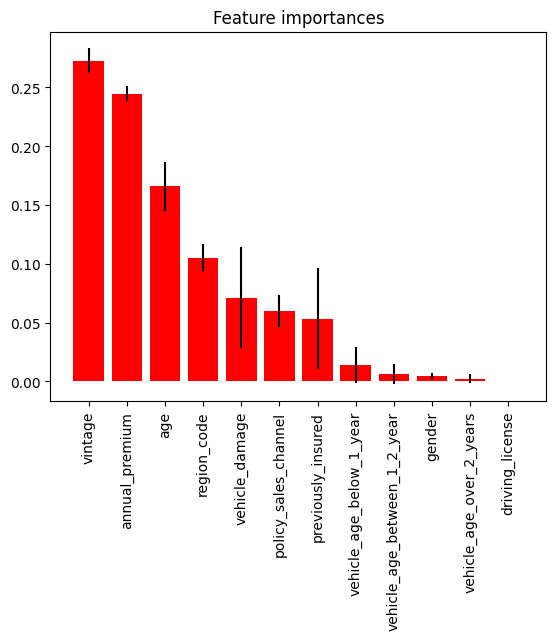

In [42]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_train_n.columns, importances):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat([df, aux], axis=0)

print(df.sort_values('importance', ascending=False))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title('Feature importances')
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x_train_n.shape[1]), x_train_n.columns[indices], rotation='vertical')  # assuming x_train_n is a DataFrame
plt.xlim([-1, x_train_n.shape[1]])
plt.show()


# 7.0 Machine Learning

In [43]:
cols_selected = ['annual_premium','vintage','age','region_code','vehicle_damage','previously_insured','policy_sales_channel']
x_train = df5[ cols_selected ]
x_val = df5[ cols_selected ]

# 7.1 KNN

In [44]:
# model definition
Knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# Model training
Knn_model.fit(x_train, y_train)

# Model prediction - Poder de Generalizacao
yhat_knn_proba = Knn_model.predict_proba(x_val)



# 7.2 Linear Regressor

In [45]:
# Model defnition
lr_model = lm.LogisticRegression( random_state=42 )
# model training
lr_model.fit( x_train, y_train )
# model predct
yhat_lr = lr_model.predict_proba( x_val )

# acumulative Gain


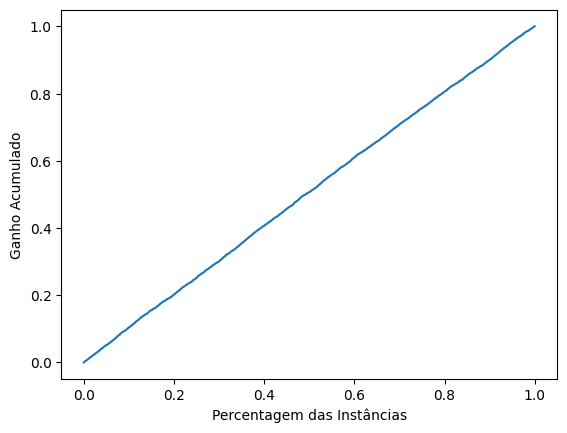

In [46]:
# Ordenar as previsões de probabilidade
sorted_indices = np.argsort(yhat_lr[:, 1])[::-1]

# Certifique-se de que y_val é um array NumPy
y_val_np = np.array(y_val)

# Certifique-se de que os índices estão dentro dos limites de y_val
sorted_indices = sorted_indices[sorted_indices < len(y_val_np)]
#
## Calcular a curva de ganho acumulado
cumulative_gain = np.cumsum(y_val_np[sorted_indices]) / np.sum(y_val_np)
#
## Plotar a curva de ganho acumulado
plt.plot(np.arange(1, len(y_val_np) + 1) / len(y_val_np), cumulative_gain)
plt.xlabel('Percentagem das Instâncias')
plt.ylabel('Ganho Acumulado')
plt.show()


# 7.2 Extra Trees

In [68]:
# Model definition
et = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )
# Model fit
et.fit( x_train, y_train)
# Model predct
yhat_et = et.predict_proba( x_val )

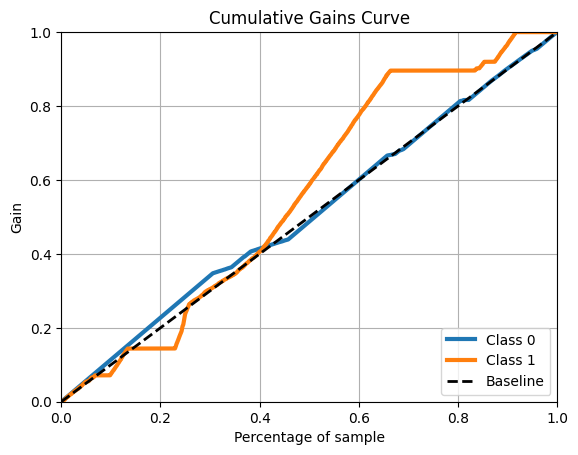

In [69]:
# Reindexar y_val para garantir alinhamento correto
y_val_reindexed = y_val.reset_index(drop=True)

# Ordenar yhat_knn_proba com base nos índices de y_val
sorted_indices = y_val_reindexed.argsort()
y_val_sorted = y_val_reindexed[sorted_indices]
yhat_knn_proba_sorted = yhat_knn_proba[sorted_indices]

# Plot Cumulative Gain
skplt.metrics.plot_cumulative_gain(y_val_sorted, yhat_knn_proba_sorted)
plt.show()


In [70]:
# Propencity Score, % Acc Propensity Score, % Base, % mean model, Lifit

# 6.0 fecture selection

# 7.0 Machine learning

6.0 Data Preparation


7.0 Machine Learning

In [1]:
import numpy as np
from scipy.stats import ttest_ind

# Simulação de dados - Vendas por dia antes e depois da campanha
vendas_antes = np.random.normal(loc=50, scale=10, size=30)  # Média de 50 unidades, desvio padrão de 10
vendas_depois = np.random.normal(loc=80, scale=15, size=30)  # Média de 80 unidades, desvio padrão de 15

# Aplicação do teste t de Student
resultado_tteste, p_valor = ttest_ind(vendas_antes, vendas_depois)

# Exibição dos resultados
print("Resultado do teste t:", resultado_tteste)
print("P-valor:", p_valor)

# Interpretação dos resultados
nivel_significancia = 0.05

if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula. Há evidências estatísticas de diferença nas vendas antes e depois da campanha.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências estatísticas de diferença nas vendas antes e depois da campanha.")


Resultado do teste t: -9.520021526454126
P-valor: 1.85997510941476e-13
Rejeitamos a hipótese nula. Há evidências estatísticas de diferença nas vendas antes e depois da campanha.
